## Data Visualization with Python - Session 2
* Two main libraries we'll be working with: matplotlib and ggplot
* matplotlib is already installed in this image, but we'll need to install ggplot

In [1]:
%%bash
pip install ggplot

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis
* What's in our data?
* Where should we focus our analysis?

In [3]:
# import data
fire_df = pd.read_csv("data/fire.csv")

## Data Types
### Qualitative
* Nominal/Categorical
* Ordinal

### Quantitative
* Ratio
    * Continuous 
    * Discrete

In [4]:
# examine our datatypes
fire_df.dtypes

Unnamed: 0                          int64
ADDRESS_X                          object
LATITUDE_X                        float64
LONGITUDE_X                       float64
AGENCY                             object
CREATE_TIME_INCIDENT               object
DISPOSITION_TEXT                   object
EVENT_NUMBER                       object
INCIDENT_TYPE_ID                   object
INCIDENT_TYPE_DESC                 object
NEIGHBORHOOD                       object
ARRIVAL_TIME_PRIMARY_UNIT          object
BEAT                               object
CLOSED_TIME_INCIDENT               object
DISPATCH_TIME_PRIMARY_UNIT         object
CFD_INCIDENT_TYPE                  object
CFD_INCIDENT_TYPE_GROUP            object
COMMUNITY_COUNCIL_NEIGHBORHOOD     object
TTA                               float64
TTC                               float64
dtype: object

In [5]:
# convert datatypes where needed
fire_df['CREATE_TIME_INCIDENT'] = pd.to_datetime(fire_df['CREATE_TIME_INCIDENT'])
fire_df['ARRIVAL_TIME_PRIMARY_UNIT'] = pd.to_datetime(fire_df['ARRIVAL_TIME_PRIMARY_UNIT'])
fire_df['CLOSED_TIME_INCIDENT'] = pd.to_datetime(fire_df['CLOSED_TIME_INCIDENT'])
fire_df['DISPATCH_TIME_PRIMARY_UNIT'] = pd.to_datetime(fire_df['DISPATCH_TIME_PRIMARY_UNIT'])

In [6]:
fire_df

,Unnamed: 0,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP,COMMUNITY_COUNCIL_NEIGHBORHOOD,TTA,TTC
0,0,S I471 AT LIBERTY,NaN,NaN,CF,2015-03-07 20:10:04,DUPLICATE INCIDENT,FCF150307000176,ACCIF,AUTO ACCIDENT INJURI,NaN,2015-03-07 20:15:15,1296,2015-03-07 20:20:50,2015-03-07 20:11:08,BLS,ACCIDENT WITH INJURY - FIRE ONLY,NaN,4.116667,10.766667
1,1,BROADWAY,39.108693,-84.508474,CFD,2018-03-09 07:36:46,AV: ADVISED,CFD180309000046,FALARM,NaN,PENDLETON,2018-03-09 07:39:59,ST03,2018-03-09 07:43:36,2018-03-09 07:37:01,FIRE,AUTOMATIC FIRE ALARM,PENDLETON,2.966667,6.833333
2,2,PARK AV,39.128356,-84.486434,CFD,2018-03-09 21:15:37,MAL: SYSTEM MALFUNCTION,CFD180309000193,FALARM,NaN,WALNUT HILLS,2018-03-09 21:18:45,ST23,2018-03-09 21:32:41,2018-03-09 21:16:27,FIRE,AUTOMATIC FIRE ALARM,WALNUT HILLS,2.300000,17.066667
3,3,SYCAMORE ST,39.106440,-84.508226,CFD,2018-03-09 13:49:58,MEDT: MEDIC TRANSPORT,CFD180309000106,30B1,POSSIBLY DANGEROUS BODY AREA,DOWNTOWN,2018-03-09 13:54:00,ST03,2018-03-09 14:45:12,2018-03-09 13:50:13,ALS,TRAUMATIC INJURIES (SPECIFIC),DOWNTOWN,3.783333,55.233333
4,4,ALAMO AV / RIDGE AV,39.161608,-84.420846,CFD,2018-03-09 17:37:03,MED: MT RESPONSE NO TRANSPORT,CFD180309000156,PERDWN-COMBINED,NaN,OAKLEY,2018-03-09 17:41:19,ST31,2018-03-09 17:42:11,2018-03-09 17:37:14,BLS,PERSON DOWN,OAKLEY,4.083333,5.133333
5,5,STRAND LN,39.187332,-84.512370,CFD,2018-03-09 20:42:23,MEDT: MEDIC TRANSPORT,CFD180309000188,24D3,IMMINENT DELIVERY ( 6 MONTHS/24 WEEKS),WINTON HILLS,2018-03-09 20:48:09,ST38,2018-03-09 21:26:49,2018-03-09 20:42:51,ALS,PREGNANCY / CHILDBIRTH / MISCARRIAGE,WINTON HILLS,5.300000,44.433333
6,6,JEFFERSON AV,39.141281,-84.514349,CFD,2018-03-09 11:56:11,MAL: SYSTEM MALFUNCTION,CFD180309000092,FALARM,NaN,CLIFTON,2018-03-09 11:58:22,ST34,2018-03-09 12:00:02,2018-03-09 11:56:38,FIRE,AUTOMATIC FIRE ALARM,CLIFTON,1.733333,3.850000
7,7,E MCMICKEN AV,39.117254,-84.516712,CFD,2018-03-09 11:12:48,EMS: NO TRANSPORT,CFD180309000080,SWAT,NaN,OVER-THE-RHINE,2018-03-09 11:27:32,ST05,2018-03-09 12:04:48,2018-03-09 11:25:37,OTHE,SWAT OPERATION,OTR,1.916667,52.000000
8,10,W MARTIN LUTHER KING JR DR,39.139360,-84.529030,CFD,2018-03-09 17:32:11,MEDT: MEDIC TRANSPORT,CFD180309000154,23C2,ABNORMAL BREATHING,CUF,2018-03-09 17:35:57,ST12,2018-03-09 18:14:31,2018-03-09 17:32:35,ALS,OVERDOSE / POSIONING (INGESTION),CUF,3.366667,42.333333
9,11,CHATEAU AV,39.107949,-84.558796,CFD,2018-03-09 15:03:40,MEDT: MEDIC TRANSPORT,CFD180309000115,24D3,IMMINENT DELIVERY ( 6 MONTHS/24 WEEKS),EAST PRICE HILL,2018-03-09 15:08:25,ST17,2018-03-09 16:07:02,2018-03-09 15:03:55,ALS,PREGNANCY / CHILDBIRTH / MISCARRIAGE,EAST PRICE HILL,4.500000,63.366667


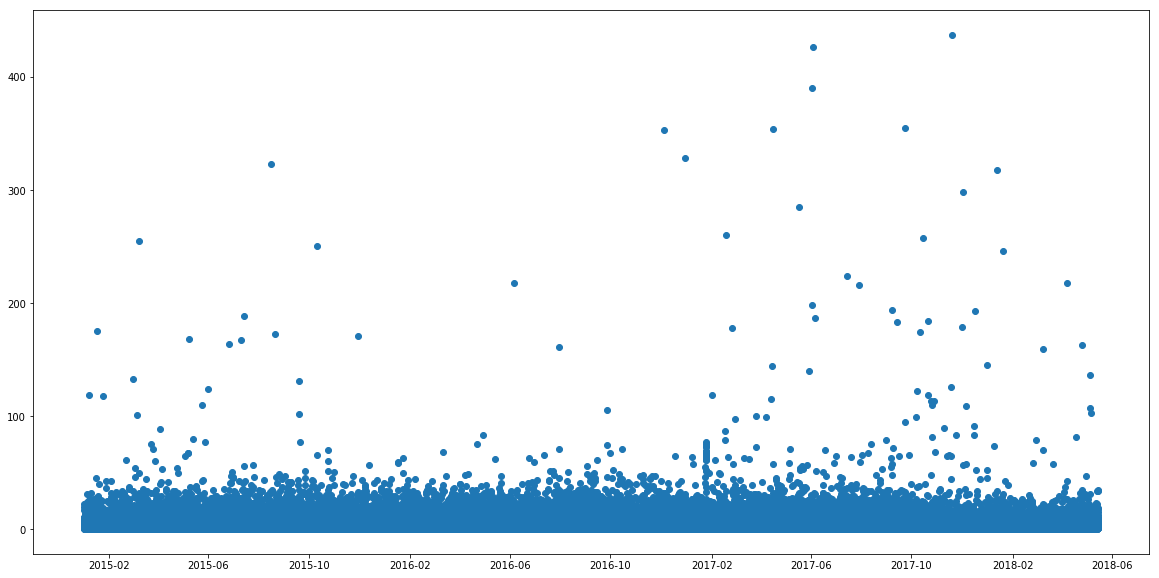

In [7]:
plt.figure(figsize=(20,10))
plt.plot_date(fire_df['CREATE_TIME_INCIDENT'], fire_df['TTA'])

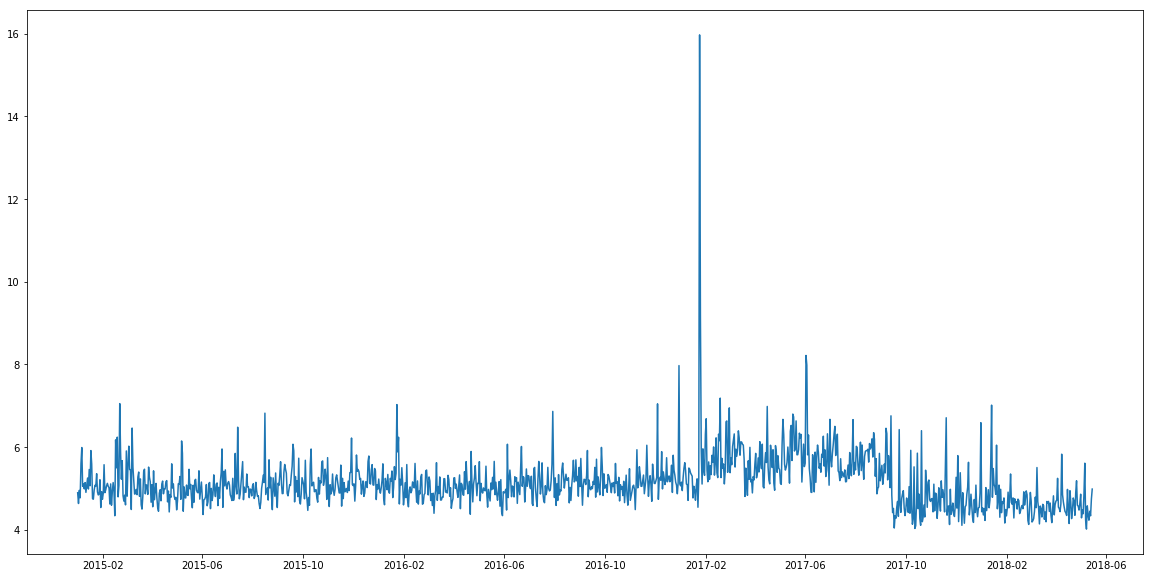

In [8]:
# The above is not a great way to gain insight from our data. Let's try a line graph
by_date = fire_df.groupby(pd.DatetimeIndex(fire_df['CREATE_TIME_INCIDENT']).normalize())
mean_TTA = by_date['TTA'].mean()
mean_TTA
plt.figure(figsize=(20,10))
plt.plot(mean_TTA)

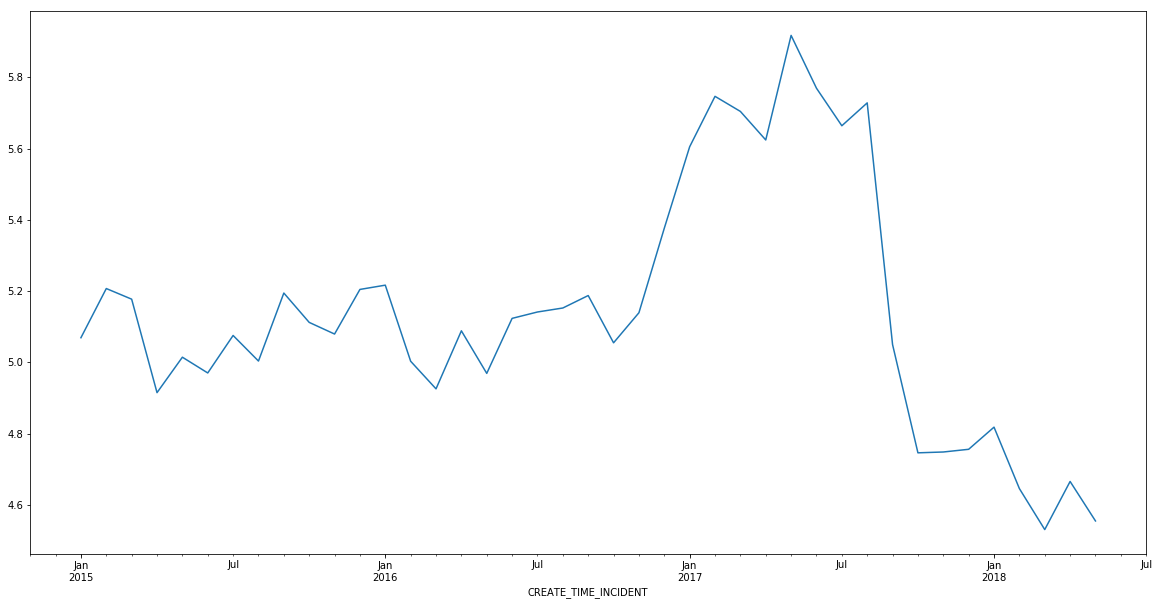

In [9]:
#patterns may emerge by grouping the data. What if we look at the mean by month?#pattern 
by_month = fire_df.groupby(fire_df['CREATE_TIME_INCIDENT'].dt.to_period('M'))
mean_monthly_TTA = by_month['TTA'].mean()
plt.figure(figsize=(20,10))
mean_monthly_TTA.plot()

(0, 5.987619563367125)

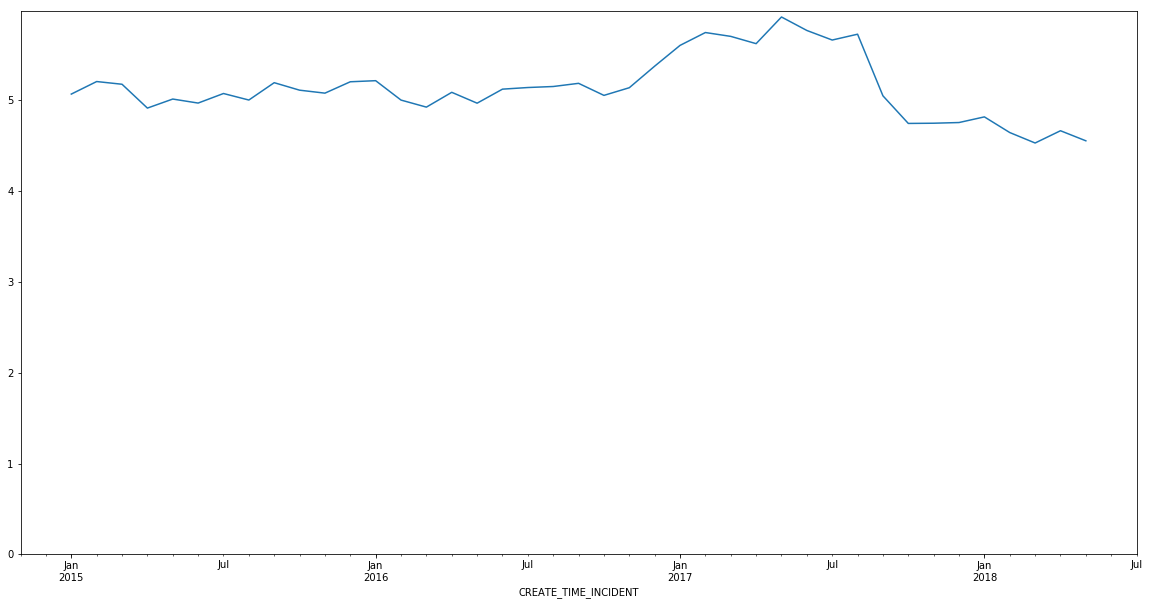

In [10]:
#A line graph showing a trend is very useful, but it the axis is not zero, it can be very misleading. 
plt.figure(figsize=(20,10))
mean_monthly_TTA.plot().set_ylim(ymin=0)

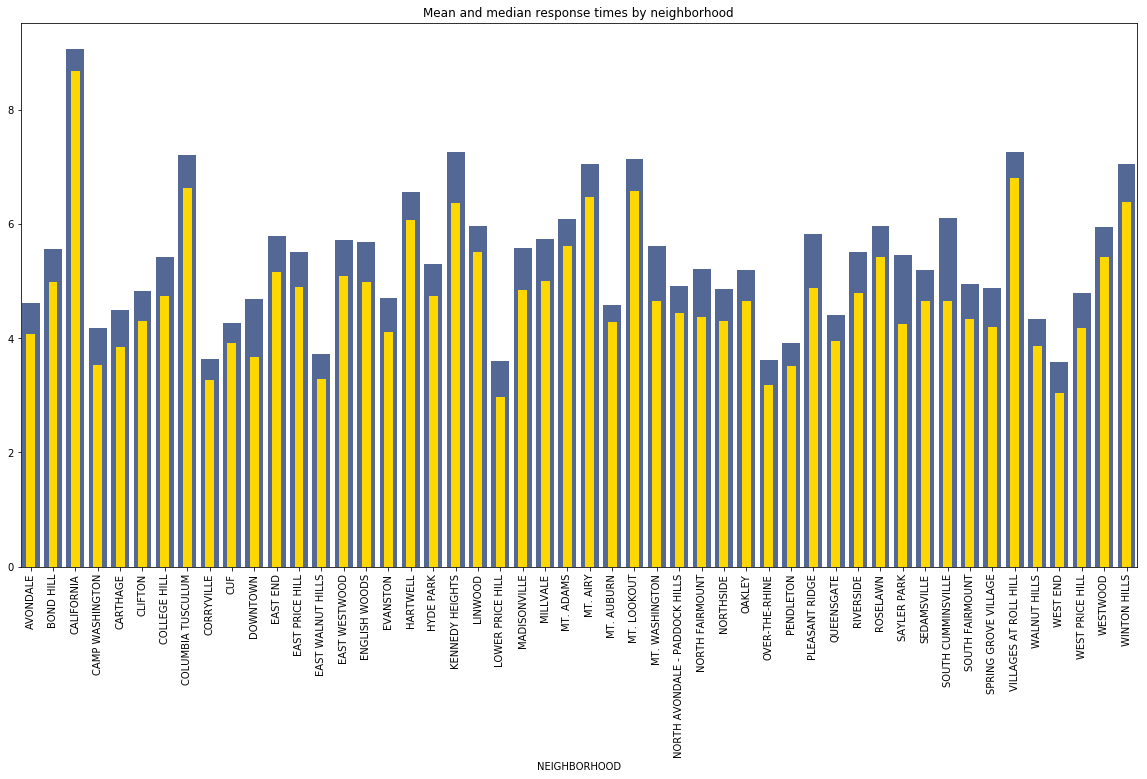

In [11]:
#Group by neighborhoods
by_neighborhood = fire_df.groupby(fire_df['NEIGHBORHOOD'])
neighborhood_means = by_neighborhood['TTA'].mean()
neighborhood_medians = by_neighborhood['TTA'].median()

plt.figure(figsize=(20,10))
plt.title('Mean and median response times by neighborhood')
neighborhood_means.plot.bar(width=0.8, color="#536895")
neighborhood_medians.plot.bar(width=0.4, color="gold")
plt.show()

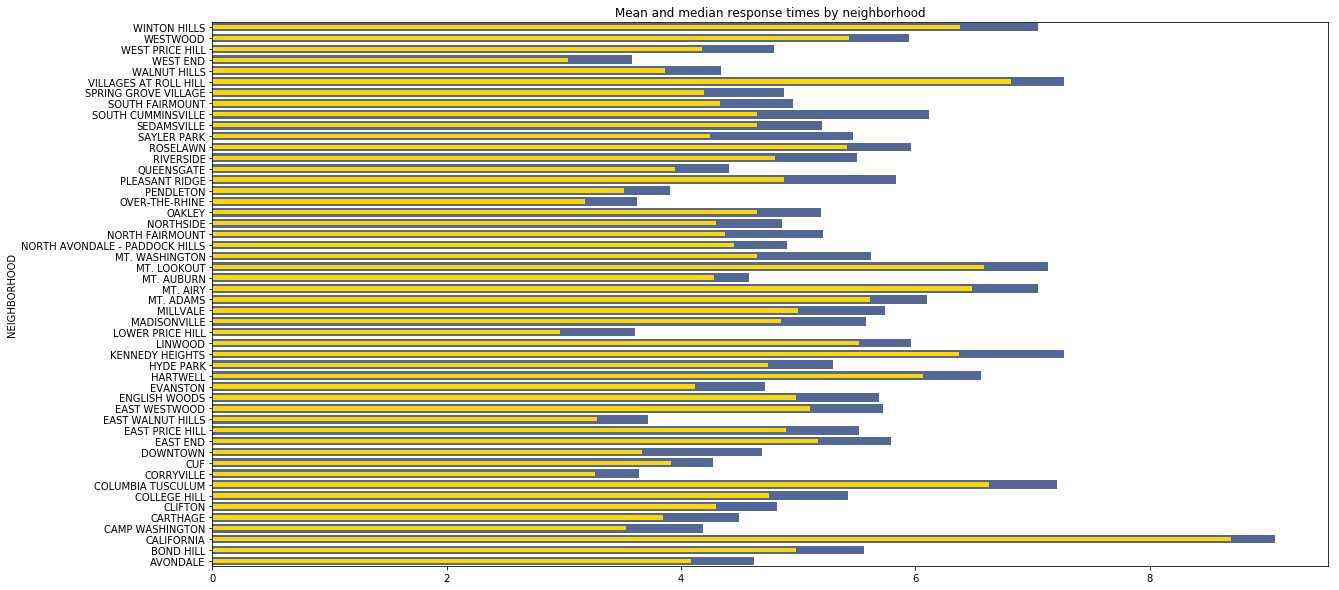

In [12]:
plt.figure(figsize=(20,10))
plt.title('Mean and median response times by neighborhood')
neighborhood_means.plot.barh(width=0.8, color="#536895")
neighborhood_medians.plot.barh(width=0.4, color="gold")
plt.show()

In [13]:
## The above is way too busy. Let's take a subset of the fastests and slowest means and plot those
sorted_resp_times = neighborhood_means.sort_values(ascending=False)
sorted_resp_times[:10]

NEIGHBORHOOD
CALIFORNIA               9.073214
VILLAGES AT ROLL HILL    7.266186
KENNEDY HEIGHTS          7.266055
COLUMBIA TUSCULUM        7.212019
MT. LOOKOUT              7.135345
MT. AIRY                 7.050391
WINTON HILLS             7.047124
HARTWELL                 6.560241
SOUTH CUMMINSVILLE       6.116964
MT. ADAMS                6.096685
Name: TTA, dtype: float64

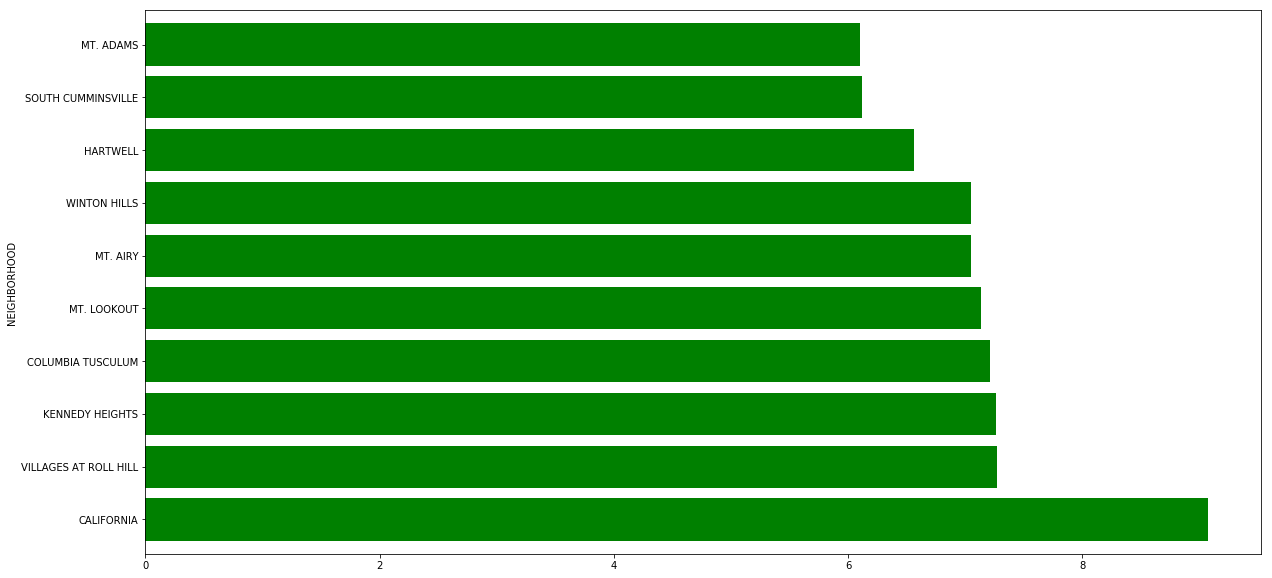

In [14]:
#Plot slowest times
plt.figure(figsize=(20,10))
sorted_resp_times[:10].plot.barh(width=0.8, color="green")

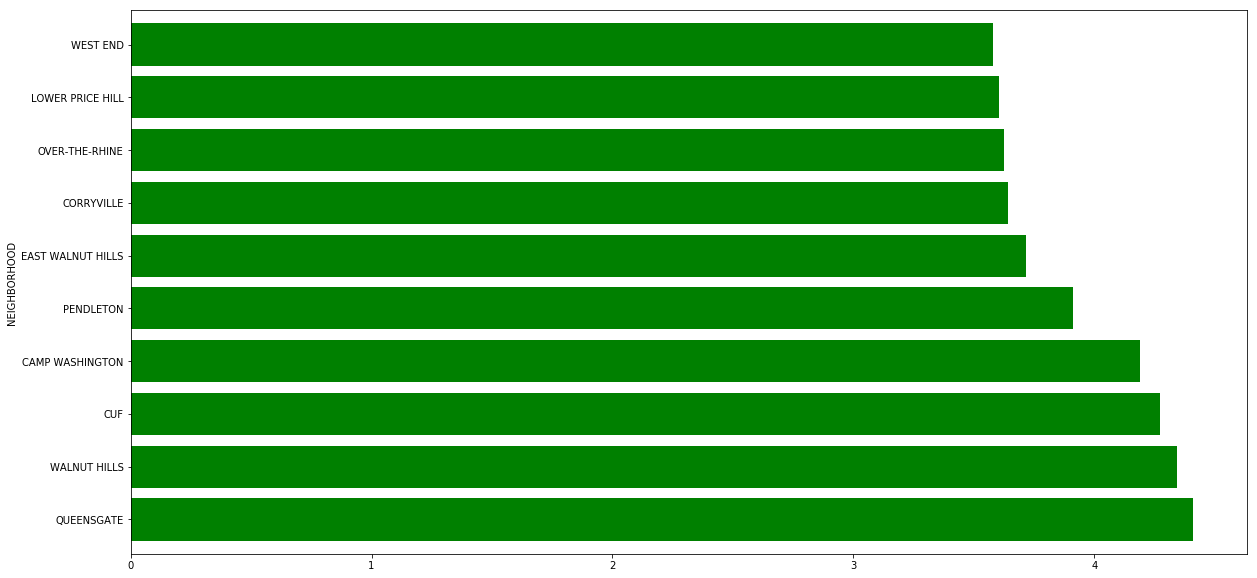

In [15]:
#plot fastest times
plt.figure(figsize=(20,10))
sorted_resp_times[-10:].plot.barh(width=0.8, color="green")

### Scale
* Note the difference in scale of the two above. This is fine for exploration, but not great for presentation.


### ggplot
* ggplot visualizations are built around the ggplot class

/opt/conda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/conda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


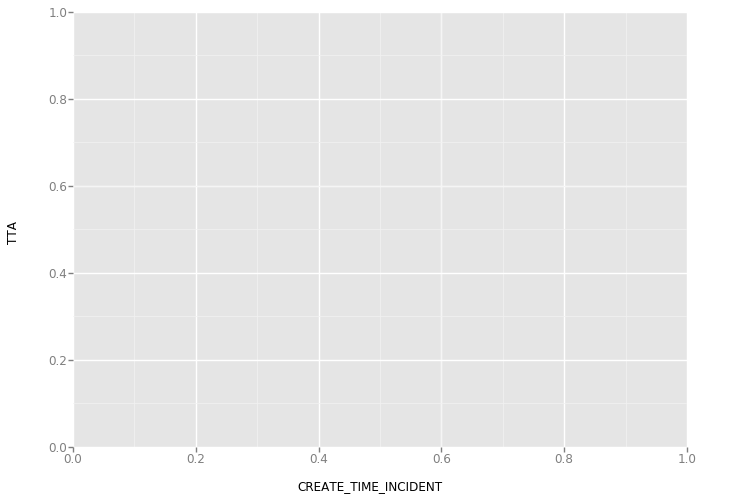

<ggplot: (8777442039956)>

In [16]:
from ggplot import *

p = ggplot(aes(x='CREATE_TIME_INCIDENT', y='TTA'), fire_df)
p

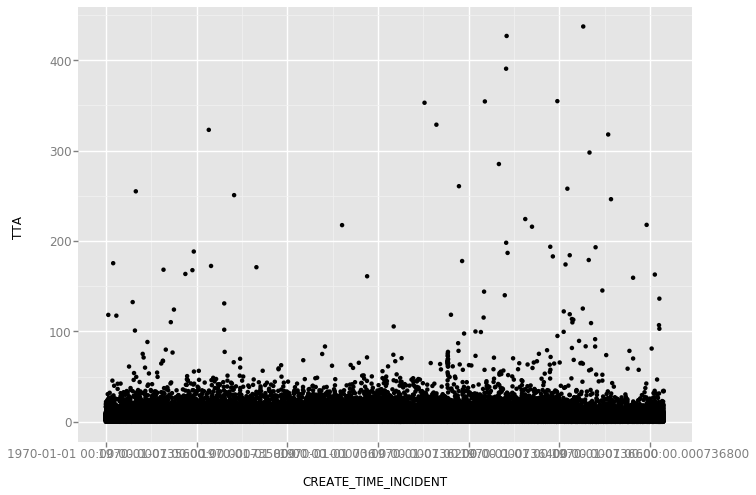

<ggplot: (8777442039956)>

In [17]:
# a ggplot object needs to be told how to plot the data
p + geom_point()

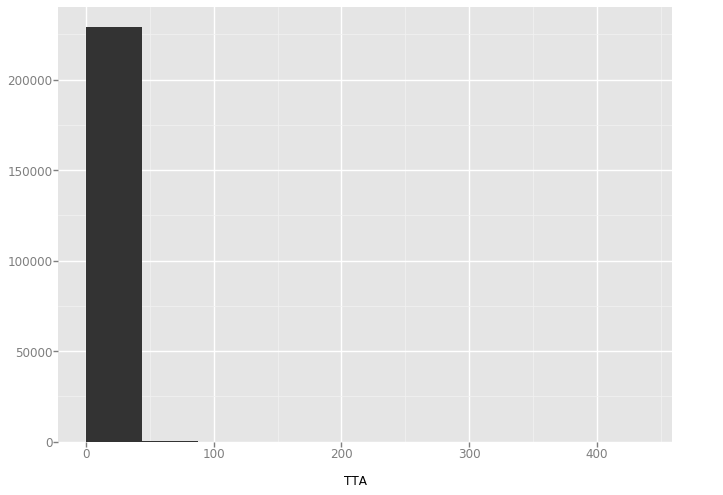

<ggplot: (-9223363259412780330)>

In [18]:
ggplot(fire_df, aes(x='TTA')) + geom_histogram()

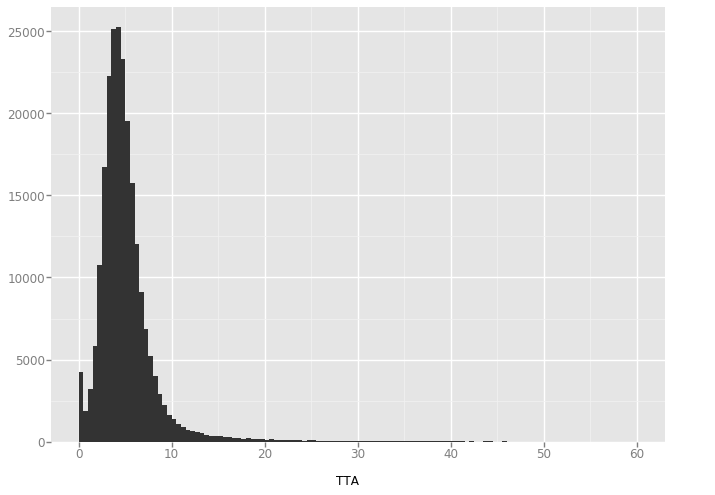

<ggplot: (8777442129142)>

In [19]:
under_60 = fire_df[fire_df['TTA'] < 60]
ggplot(under_60, aes(x='TTA')) + geom_histogram(binwidth=0.5)

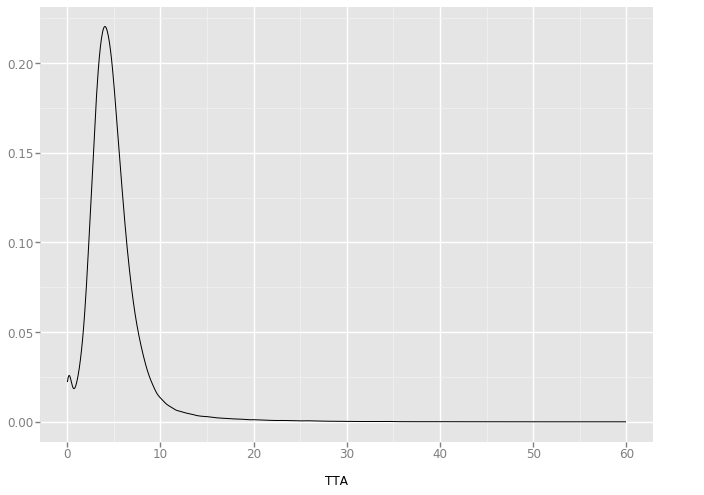

<ggplot: (8777442001889)>

In [20]:
ggplot(under_60, aes(x='TTA')) + geom_density()

In [34]:
fire_df['weekday'] = fire_df['CREATE_TIME_INCIDENT'].apply(lambda x: x.weekday())
by_weekday = fire_df.groupby(fire_df['weekday'])


,Unnamed: 0,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP,COMMUNITY_COUNCIL_NEIGHBORHOOD,TTA,TTC
weekday,,,,,,,,,,,,,,,,,,,,
0,32718,32718,30059,30059,32718,32718,32718,32718,32718,27847,30333,32718,32705,32718,32718,32632,32632,30021,32718,32718
1,33150,33150,30503,30503,33150,33150,33150,33150,33150,28082,30747,33150,33133,33150,33150,33037,33037,30460,33150,33150
2,32737,32737,30064,30064,32737,32737,32737,32737,32737,27696,30313,32737,32725,32737,32737,32652,32652,30017,32737,32737
3,32963,32963,30223,30223,32963,32963,32963,32963,32963,27768,30498,32963,32950,32963,32963,32856,32856,30186,32963,32963
4,33236,33236,30474,30474,33236,33236,33235,33236,33236,27928,30718,33236,33223,33236,33236,33141,33141,30429,33236,33236
5,32624,32624,29913,29913,32624,32624,32624,32624,32624,27231,30113,32624,32609,32624,32624,32519,32519,29864,32624,32624
6,31602,31602,29060,29060,31602,31602,31602,31602,31602,26650,29280,31602,31591,31602,31602,31522,31522,29030,31602,31602


## Summary
* Exploratory visualizations aren't always pretty. They're meant to increase data understanding.
* We've found a couple of patterns and relationships that might be used to develop a hypothesis.
* All the visualizations in the world won't help unless the data has been converted to the correct level of grain for the question.
